# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

Objective:- 

    Study the Haberman's cancer survival dataset and carry out indepth analysis so as to analyse the survival with respect
    to the parameters provided. as to which parameter is related more to the survival and contributes more, which all features 
    can be helpful in further design of a machine learning model which can predict the survival for a patient.
    

In [1]:
# Supress Warnings

import warnings 

warnings.filterwarnings("ignore")

In [2]:
# Import required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load Haberman dataset into a pandas dataframe

haber = pd.read_csv("haberman.csv")

In [4]:
# Que: how many data-points and features?

print (haber.shape)

# There are 306 observations or data points and 4 features. Means, this dataset has 306 patients data.

(306, 4)


In [5]:
# Que: What are the various columns in our dataset?

haber.columns

# There are four columns named age, year, nodes and status.

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
# Que: How the sample data looks for patients in Haberman's dataset.

haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
# Que - Are there cancer patients in the dataset for which we don't have all the information available? 
# What kind of data it is categorical or numerical.

haber.info()

# Complete information is present for all 306 patients. All information represents numerical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
# Que - what is the age of youngest and eldest patient?
# Que - Which age group has more cancer patients?
# Que - Is there any specific year in which more patients are reported.

haber.describe().T

# Youngest patient is 30 years and eldest is 83 years.
# Age group of 44 -60 is more prone to cancer and has almost 50% of the cancer patients.

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [9]:
# Segregate survived and non survived patient repords

haber_survived = haber.loc[haber['status'] == 1];
haber_nonsurvived = haber.loc[haber['status'] != 1];

# Calculate Means
print("Means:-\n")
print("Survived people's mean age:", haber_survived['age'].mean())
print("Non-survived people's mean age:", haber_nonsurvived['age'].mean(),"\n")

print("Survived people's mean nodes:", haber_survived['nodes'].mean())
print("Non-survived people's mean nodes:",haber_nonsurvived['nodes'].mean(),"\n")

# Calculate Medians
print("Medians:-\n")
print("Survived people's median age:", haber_survived['age'].median())
print("Non-survived people's median age:",haber_nonsurvived['age'].median(),"\n")

print("Survived people's median nodes:", haber_survived['nodes'].median())
print("Non-survived people's median nodes:",haber_nonsurvived['nodes'].median(),"\n")

# Calculate Standard Deviation
print("Standard Deviations:-\n")
print("Survived people's std deviation of age :", haber_survived['age'].std())
print("Non-survived people's std deviation of age:",haber_nonsurvived['age'].std(),"\n")

print("Survived people's std deviation of nodes:", haber_survived['nodes'].std())
print("Non-survived people's std deviation of nodes:",haber_nonsurvived['nodes'].std(),"\n")


Means:-

Survived people's mean age: 52.01777777777778
Non-survived people's mean age: 53.67901234567901 

Survived people's mean nodes: 2.7911111111111113
Non-survived people's mean nodes: 7.45679012345679 

Medians:-

Survived people's median age: 52.0
Non-survived people's median age: 53.0 

Survived people's median nodes: 0.0
Non-survived people's median nodes: 4.0 

Standard Deviations:-

Survived people's std deviation of age : 11.012154179929546
Non-survived people's std deviation of age: 10.16713720829741 

Survived people's std deviation of nodes: 5.870318127719728
Non-survived people's std deviation of nodes: 9.185653736555782 



In [10]:
# Que: How many patients survived and how many died who underwent the surgery for cancer treatment?
# Que: balanced-dataset vs imbalanced datasets?

haber["status"].value_counts()

# Around 73% of the patients survived after surgery. It is not a perfectly balanced dataset as 73% and 27% are the 
# ratios of survived and non-survived patients.

1    225
2     81
Name: status, dtype: int64

# Univariate Analysis

Lets try to understand the distribution of various features in the haberman dataset, the cumulative distribution along with other plotting mechanisms as Box plot and Violin plot.

Text(0, 0.5, 'Frequency or Probability')

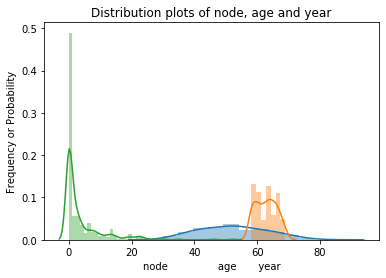

In [11]:
# Plot distributions of three independent variables

sns.distplot(haber['age'])
sns.distplot(haber['year'])
sns.distplot(haber['nodes'])
plt.xlabel("node                age       year")
plt.title("Distribution plots of node, age and year")
plt.ylabel("Frequency or Probability")


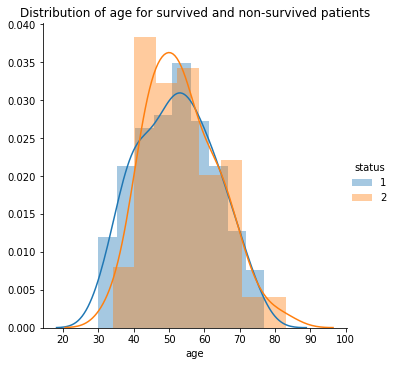

In [12]:
# Plot distribution of age for survived and non-survived patients

sns.FacetGrid(haber, hue="status", size=5) \
.map(sns.distplot, "age") \
.add_legend();
plt.title("Distribution of age for survived and non-survived patients")

plt.show();

# Below plot shows that the distributions are almost overlapping for both the kind of patients.

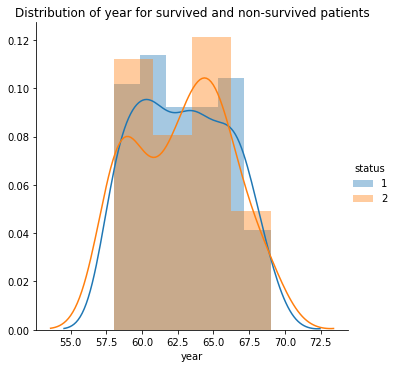

In [13]:
# Plot distributions of year against different status values 

sns.FacetGrid(haber, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.title("Distribution of year for survived and non-survived patients")

plt.show();

# years distribution as well is overlapping for both the types of status values.

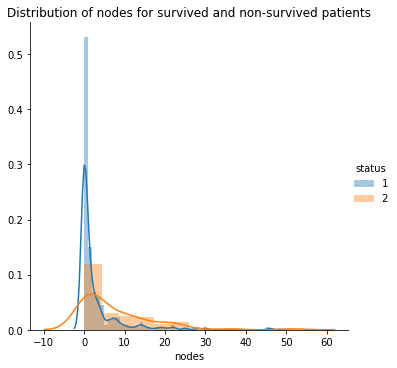

In [14]:
# Plot distribution of nodes for different status.

sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Distribution of nodes for survived and non-survived patients")

plt.show();

# Nodes distribution as well overlaps to a big extent over the various status values.

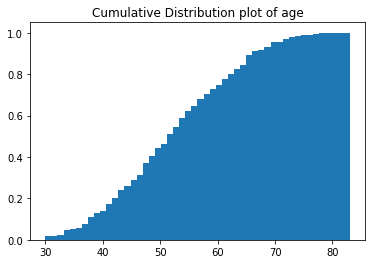

In [15]:
# Plot cumulative density frequency for age 

plt.hist(haber['age'],cumulative=True, density=True, bins=50)
plt.title("Cumulative Distribution plot of age")
plt.show()


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


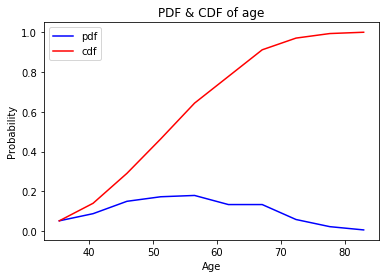

In [16]:
# plotting the pdf and cdf of  age

counts, bin_edges = np.histogram(haber['age'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.title("PDF & CDF of age")
plt.legend((pdf,cdf),('pdf','cdf'))
plt.xlabel("Age")
plt.ylabel("Probability")
plt.plot(bin_edges[1:],pdf,'b-',label='pdf')
plt.plot(bin_edges[1:], cdf,'r-',label='cdf')
plt.legend()
plt.show()

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


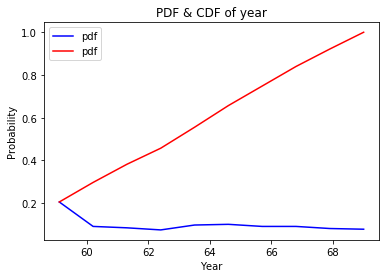

In [17]:
# plotting the pdf and cdf of  year

counts, bin_edges = np.histogram(haber['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.title("PDF & CDF of year")
plt.legend((pdf,cdf),('pdf','cdf'))
plt.xlabel("Year")
plt.ylabel("Probability")
plt.plot(bin_edges[1:],pdf,'b-',label='pdf')
plt.plot(bin_edges[1:], cdf,'r-',label='pdf')
plt.legend()
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


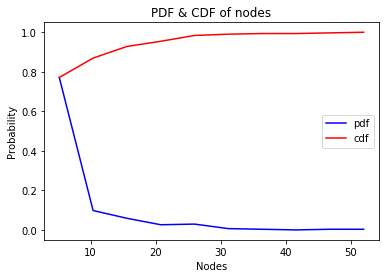

In [18]:
# plotting the pdf and cdf of nodes

counts, bin_edges = np.histogram(haber['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.title("PDF & CDF of nodes")
plt.xlabel("Nodes")
plt.ylabel("Probability")
plt.plot(bin_edges[1:],pdf,'b-',label='pdf')
plt.plot(bin_edges[1:], cdf ,'r-',label='cdf')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box plots of age for survived and non-survived patients')

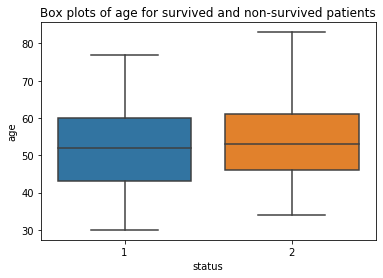

In [19]:
# Box plot of age wrt the status

sns.boxplot(x='status',y='age',data=haber)
plt.title("Box plots of age for survived and non-survived patients")

# Box plot are similar which shows that for survived and non survived patients both median of age is almost 
# same and with other quantiles.

Text(0.5, 1.0, 'Box plots of year for survived and non-survived patients')

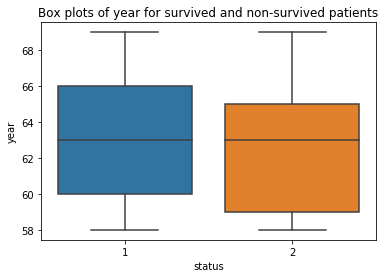

In [20]:
# Box plot of years wrt the status

sns.boxplot(x='status',y='year',data=haber)
plt.title("Box plots of year for survived and non-survived patients")

#Box plots are approximately same, median looks almost similar.

Text(0.5, 1.0, 'Box plots of node for survived and non-survived patients')

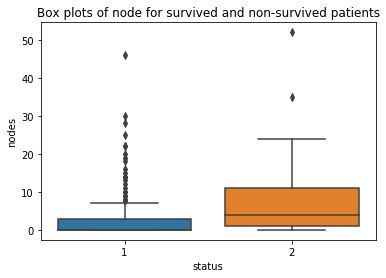

In [21]:
# Box plot of nodes wrt the status

sns.boxplot(x='status',y='nodes',data=haber)
plt.title("Box plots of node for survived and non-survived patients")

# Nodes have lot of outlier values for survived patients.


Text(0.5, 1.0, 'Violin plots of age for survived and non-survived patients')

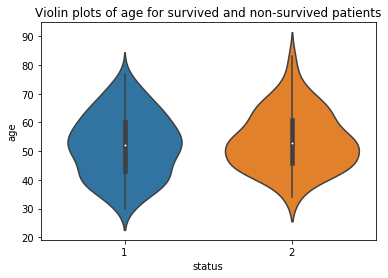

In [22]:
# Plot violin plot for age

sns.violinplot(x='status',y='age',data=haber,size=2)
plt.title("Violin plots of age for survived and non-survived patients")

# Similar violin plots for both the status shows no relation of age with survival or nonsurvival.

Text(0.5, 1.0, 'Violin plots of year for survived and non-survived patients')

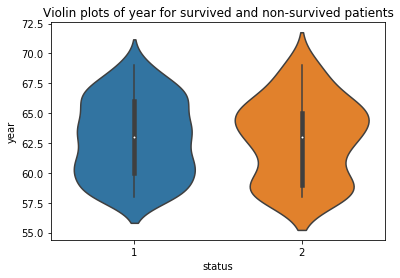

In [23]:
# Plot violin plot for year

sns.violinplot(x='status',y='year',data=haber,size=2)
plt.title("Violin plots of year for survived and non-survived patients")

# Almost similar violin plots for both the status shows no relation of year with survival or nonsurvival.


Text(0.5, 1.0, 'Violin plots of node for survived and non-survived patients')

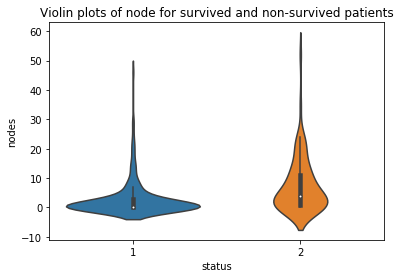

In [24]:
# plot violin plot for nodes

sns.violinplot(x='status',y='nodes',data=haber,size=5)
plt.title("Violin plots of node for survived and non-survived patients")

# For survived, the peak is at almost 0, which is the similar case for non-survival as well but the non-survival plot has mode 
# variance/std dev in comparison to survived.

# Bivariate Analysis

Text(0.5, 1.0, 'Scatter plot of age with status')

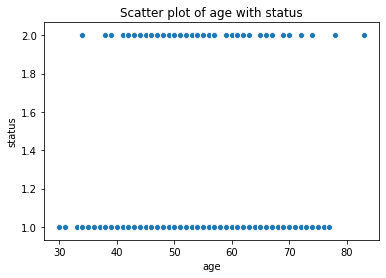

In [25]:
# 1D scatter plot 

sns.scatterplot(x='age',y='status',data=haber)
plt.title("Scatter plot of age with status")

# seing below scatter plot we see that both the status are spread over almost similar age groups.

Text(0.5, 1.0, 'Scatter plot of year with status')

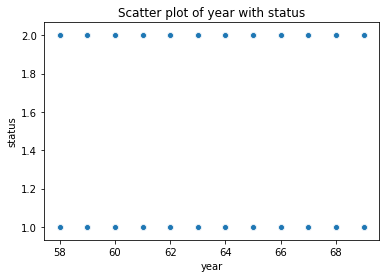

In [26]:
# scatter plot of year with status

sns.scatterplot(x='year',y='status',data=haber)
plt.title("Scatter plot of year with status")
# seing below scatter plot as well we dont see any patteren or relation between year and survival.


Text(0.5, 1.0, 'Scatter plot of node with status')

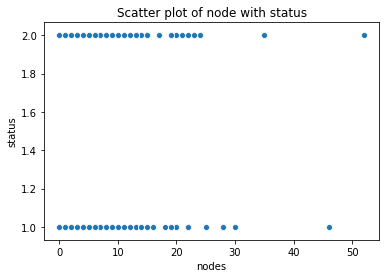

In [27]:
# Scatter plot of nodes with status

sns.scatterplot(x='nodes',y='status',data=haber)
plt.title("Scatter plot of node with status")

# seing below scatter plot as well we dont see any patteren or relation between nodes and survival.


# 2D Scatter Plots 

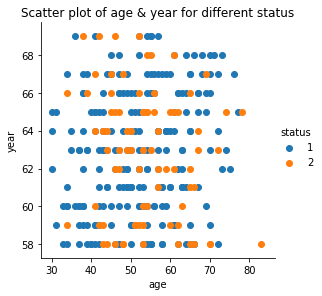

In [28]:
# Plot age and year with diferent colors for status

sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("Scatter plot of age & year for different status")
plt.show();

# Below plot shows that there is no clear cut segregation of survived and non survived people of different age groups and year.

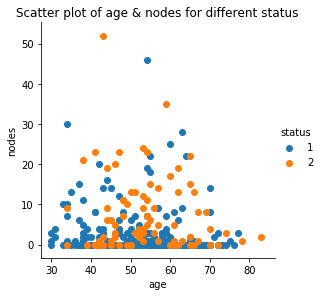

In [29]:
# Scater plot of age and nodes with various status

sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot of age & nodes for different status")
plt.show();

# Even below plot doesn't show any relationship betwee age, nodes to survival.

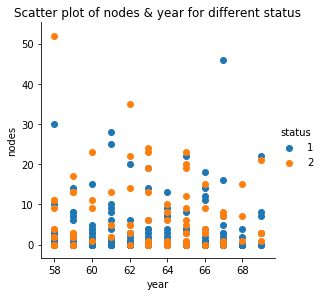

In [30]:
# Scatter plot of year and nodes with status

sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("Scatter plot of nodes & year for different status")
plt.show();

#Below plot as well have points scatterred all over the place and doesn't shows any relationship.

Text(0.0, 1, 'Contour plot of year & age')

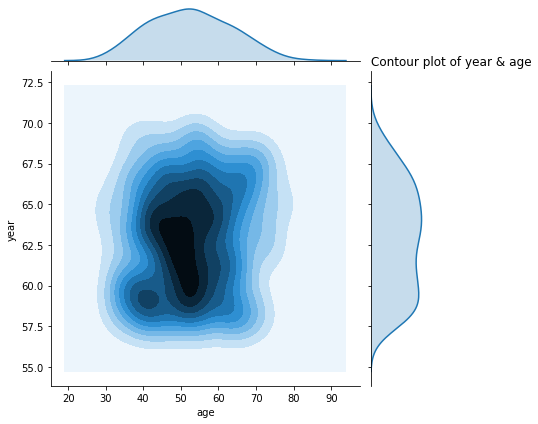

In [31]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="year", data=haber, kind="kde")
plt.title("Contour plot of year & age",loc='left')


#seeing below contour plot we can say that people in age group of 40-60 are the most who are impacted across all years.

Text(0.0, 1, 'Contour plot of nodes & age')

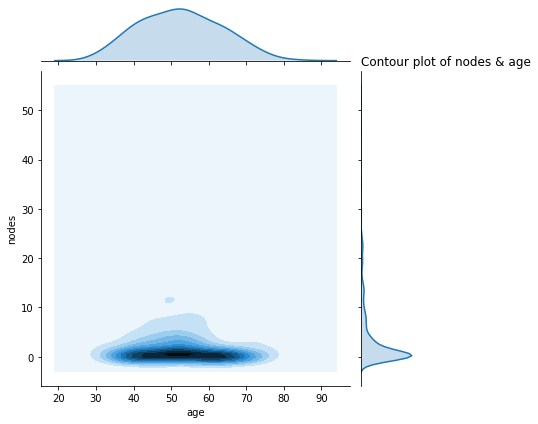

In [32]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="nodes", data=haber, kind="kde")
plt.title("Contour plot of nodes & age",loc='left')

# Can't deduce any useful information out of below plot.

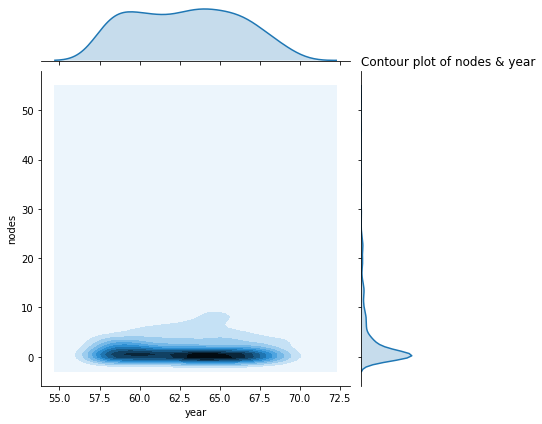

In [33]:
#2D Density plot, contors-plot

sns.jointplot(x="year", y="nodes", data=haber, kind="kde");
plt.title("Contour plot of nodes & year", loc='left')
plt.show()

# most of the nodes are around 0 in the age group of 57 - 67.

# Pairplot 

<function matplotlib.pyplot.show(*args, **kw)>

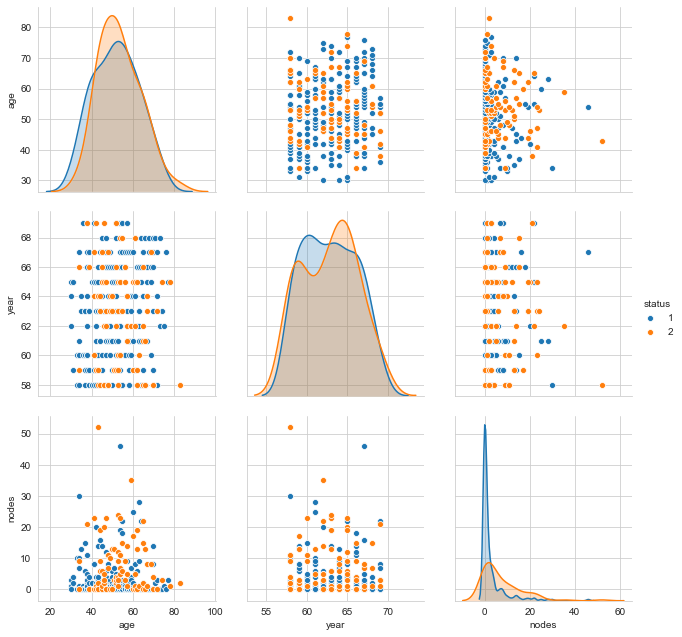

In [34]:
# Plot pairplot - A plot between two variables including all possible combinations

plt.close
sns.set_style("whitegrid")
sns.pairplot(haber, vars=['age','year','nodes'], hue="status", size=3)
plt.show

# Below pairplots doesn't show any usable information to clearly segregate the different patients using either of the features.

Observations:-
    
1. Seeing the all possible plots of various combination of one/two/theree variables, there doesn't seem to be a clearcut and obvious relationship  between any of the parameters to the patient's survival/non-survival.
2. No clearcut conclusion can be drawn that which parameter have strong relationship with the status.
3. The distribution of the individual variables for survived and non-survived are almost same for age and year variables.
4. 'nodes' has a different distribution for different status's but still there is quite huge overlap and nothing can be   said clearly .